In [1]:
import pickle

with open('users_network.pkl', 'rb') as f:
    users_network = pickle.load(f)

In [2]:
import networkx as nx
import community
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [3]:
def remove_duplicates(edges):
    list_set = set(edges) 
    edges = (list(list_set)) 
    return edges

def get_edges(users_network):
    edges = []
    for row in users_network.values.tolist():
        username = row[0]
        for user in row[1]:
            if user in users_network['username'].values:
                edge = tuple(sorted((username, user)))
                edges.append(edge)
    return remove_duplicates(edges)

In [4]:
print(len(users_network['username'].values.tolist()))
print(len(get_edges(users_network)))

315
6233


In [5]:
G = nx.Graph()
G.add_nodes_from(users_network['username'].values.tolist())
G.add_edges_from(get_edges(users_network))

In [6]:
print(len(G.nodes))
print(len(G.edges))

315
6233


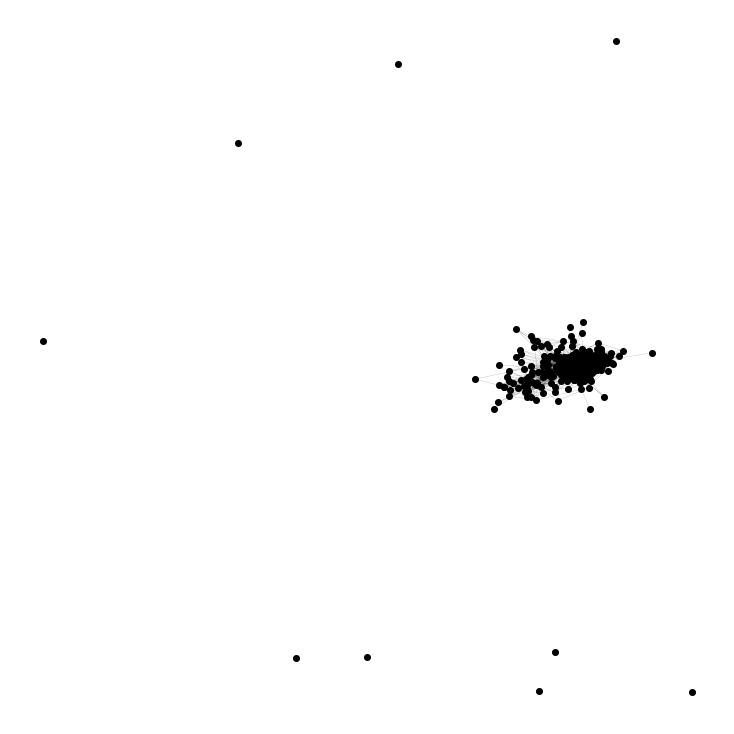

In [7]:
options = {
    'node_color': 'black',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
}
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, **options)

## Communities

In [8]:
partition = community.best_partition(G)
print("Number of communities: ", len(set(partition.values())))
mod = community.modularity(partition, G)
print("Modularity: ", mod)

Number of communities:  13
Modularity:  0.24580104153150575


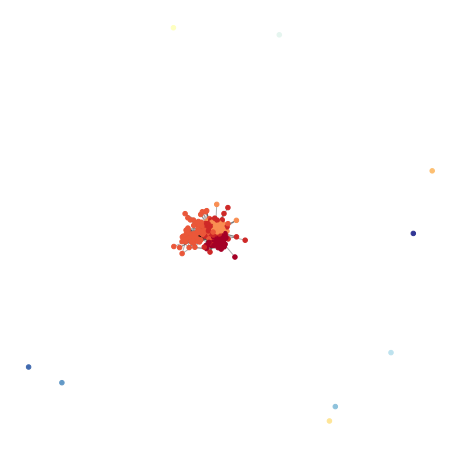

In [9]:
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)

In [10]:
communities = []
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    communities.append(list_nodes)
print(len(communities))

13


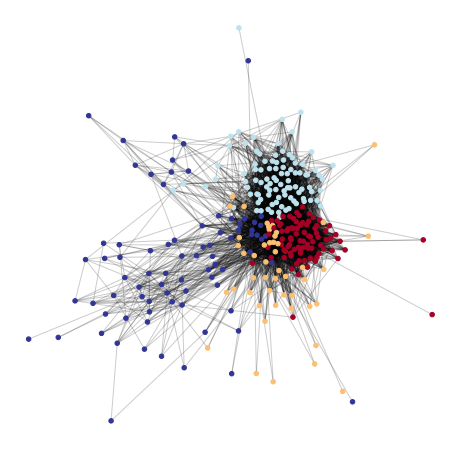

In [11]:
G_comm = nx.Graph()
G_comm.add_edges_from(get_edges(users_network))

partition = community.best_partition(G_comm)

pos = nx.spring_layout(G_comm)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(G_comm, pos, node_size=20, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_comm, pos, alpha=0.2)

In [42]:
print("#####G#####")
print("Avg clustering: ", nx.algorithms.cluster.average_clustering(G))
print("Connected components: ", len(list(nx.connected_components(G))))
print("Max degree: ", max(G.degree(), key=lambda x: x[1]))
print("Avg degree: ", sum([x[1] for x in G.degree()])/len(G.degree()))
print("\n#####G_comm#####")
print("Avg clustering: ", nx.algorithms.cluster.average_clustering(G_comm))
print("Connected components: ", len(list(nx.connected_components(G_comm))))
print("Max degree: ", max(G_comm.degree(), key=lambda x: x[1]))
print("Avg degree: ", sum([x[1] for x in G.degree()])/len(G_comm.degree()))


#####G#####
Avg clustering:  0.36183086954734517
Connected components:  10
Max degree:  ('kobywatelska', 152)
Avg degree:  39.574603174603176

#####G_comm#####
Avg clustering:  0.3724729539457963
Connected components:  1
Max degree:  ('kobywatelska', 152)
Avg degree:  40.73856209150327


In [65]:
import pickle

with open('communities.pkl', 'wb') as f:
    pickle.dump(communities, f)

with open('partition.pkl', 'wb') as f:
    pickle.dump(partition, f)


4
